In [1]:
import json
from pathlib import Path

import pandas as pd
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
from tqdm.notebook import tqdm
from youtube_transcript_api import YouTubeTranscriptApi

DATA_DIR = Path('/Users/darenasc/projects/un-speeches/data')

In [2]:
# TODO Download the data from google spredsheets
df_speech_url = pd.read_csv(DATA_DIR / "UN Speeches.csv")

In [3]:
def get_transcript(video_id: str, start: str = None, end: str = None) -> list[str]:
    # TODO Add filter with start time and end time, to cut introductions.
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    corpus = [x['text'] for x in transcript]
    large_corpus = ' '.join([x for x in corpus])
    return transcript, large_corpus

def save_json(data: dict, country: str, output_path: Path = DATA_DIR / "2023"):
    with open(output_path / f"{country}.json", "w") as outfile:
        json.dump(data, outfile)

def download_speech_transcriptions(df_speech_url: pd.DataFrame):
    pbar = tqdm(df_speech_url.iterrows(), total=len(df_speech_url))
    for i, r in pbar:
        pbar.set_description(r['country'])
        transcript, large_corpus = get_transcript(r['url'].split('?v=')[-1])
        save_json(transcript, r['country'])

In [4]:
download_speech_transcriptions(df_speech_url)

  0%|          | 0/29 [00:00<?, ?it/s]

In [5]:
# Sentiment Analysis
from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [6]:
with open(DATA_DIR / "2023" / 'Algeria.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)
 
print(json_object)
print(type(json_object))

[{'text': 'his Excellency', 'start': 0.0, 'duration': 5.1}, {'text': 'the assembly will now hear an address by', 'start': 2.879, 'duration': 4.821}, {'text': 'his Excellency', 'start': 5.1, 'duration': 2.6}, {'text': "president of the demo people's", 'start': 11.34, 'duration': 4.499}, {'text': 'Democratic Republic of Algeria our', 'start': 13.38, 'duration': 4.319}, {'text': 'request protocol to escort his', 'start': 15.839, 'duration': 4.28}, {'text': 'Excellency', 'start': 17.699, 'duration': 2.42}, {'text': 'on behalf of the general assembly', 'start': 21.119, 'duration': 5.881}, {'text': 'it is my honor to welcome his Excellency', 'start': 23.82, 'duration': 6.18}, {'text': 'Abdul mahid tibune president of the', 'start': 27.0, 'duration': 5.279}, {'text': "people's Democratic Republic of Algeria", 'start': 30.0, 'duration': 4.86}, {'text': 'and to invite him to address the', 'start': 32.279, 'duration': 4.94}, {'text': 'assembly', 'start': 34.86, 'duration': 2.359}, {'text': 'Rahi

In [7]:
def get_video_id(url: str) -> str:
    return url.split('?v=')[-1]

transcript, large_corpus = get_transcript(get_video_id(df_speech_url.iloc[0]['url']))

In [8]:
from wordcloud import WordCloud

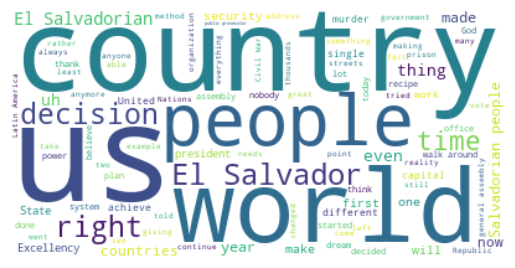

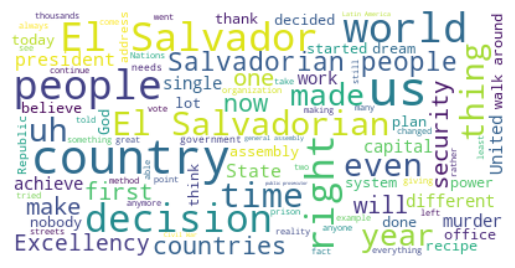

In [11]:
wordcloud = WordCloud(background_color="white").generate(large_corpus)

import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, background_color="white").generate(large_corpus)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
import geopandas as gpd

In [16]:
# countries shape https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
geo_data = gpd.read_file('/Users/darenasc/projects/un-speeches/data/ne_110m_admin_0_countries.zip')

In [50]:
geo_data[geo_data['SOVEREIGNT']=='El Salvador']
# geo_data[geo_data['SOVEREIGNT']=='Algeria'][['scalerank','ADMIN','geometry']]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
37,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


<Axes: >

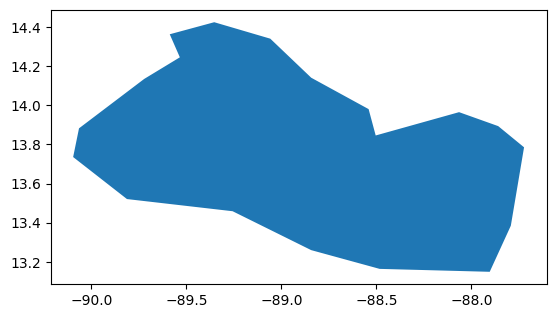

In [51]:
geo_data[geo_data['SOVEREIGNT']=='El Salvador'].plot()

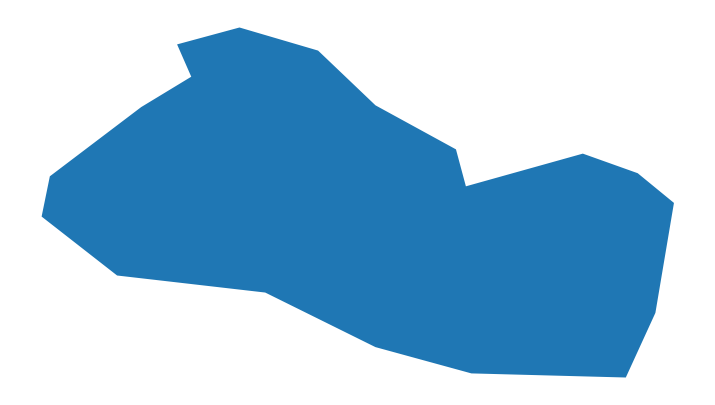

In [52]:
ax = geo_data[geo_data['SOVEREIGNT']=='El Salvador'].plot(figsize=(20,5))
ax.axis('off')
ax.figure.savefig("el_salvador.jpg")
# plt.savefig('world.jpg')

In [45]:
import numpy as np
from PIL import Image

from wordcloud import WordCloud, STOPWORDS

In [53]:
country_mask = np.array(Image.open('/Users/darenasc/projects/un-speeches/notebooks/diego/el_salvador.jpg'))
stopwords = set(STOPWORDS)

In [59]:
wc = WordCloud(background_color="white", max_words=2000, mask=country_mask, stopwords=stopwords, contour_width=3, contour_color='steelblue')
wc.generate(large_corpus)
wc.to_file("el_salvador_words.png");
# show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(country_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [18]:
for text in transcript[:100]:
    print(text['text'], classifier(text['text']))
# large_corpus

scored his Excellency [{'label': 'POSITIVE', 'score': 0.9998168349266052}]
the assembly will hear an address by his [{'label': 'POSITIVE', 'score': 0.99413001537323}]
Excellency naive Armando bouquet [{'label': 'POSITIVE', 'score': 0.9531665444374084}]
president of the Republic of El Salvador [{'label': 'POSITIVE', 'score': 0.9986727237701416}]
I request protocol to escort his [{'label': 'NEGATIVE', 'score': 0.7811423540115356}]
Excellency [{'label': 'POSITIVE', 'score': 0.9997441172599792}]
on behalf of the general assembly [{'label': 'POSITIVE', 'score': 0.9926676154136658}]
I have the honor to welcome his [{'label': 'POSITIVE', 'score': 0.9998327493667603}]
Excellency type Armando bouquet [{'label': 'POSITIVE', 'score': 0.9994214773178101}]
president of the Republic of El Salvador [{'label': 'POSITIVE', 'score': 0.9986727237701416}]
and to invite him to address the [{'label': 'POSITIVE', 'score': 0.9968786239624023}]
assembly [{'label': 'POSITIVE', 'score': 0.9893916845321655}]
[App